In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

df_test = pd.read_feather("../data/processed/test_data_processed.feather")
X_test = df_test.drop(columns=['TLJYWBE'])
y_test = df_test['TLJYWBE']
X_test.shape

(141533, 221)

# Predict on test set

In [2]:
dtest = xgb.DMatrix(X_test, label=y_test)

# Create a booster object
loaded_model = xgb.Booster()

# Load the model from the file 
loaded_model.load_model('../model/finalized_model.json') 
predictions = loaded_model.predict(dtest)
print("loaded")

# Evaluation
rmse = mean_squared_error(y_test, predictions)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, predictions)
print(f"R^2 Error: {r2}")

loaded
Root Mean Squared Error: 0.5186933011940343
R^2 Error: 0.48130669880596566


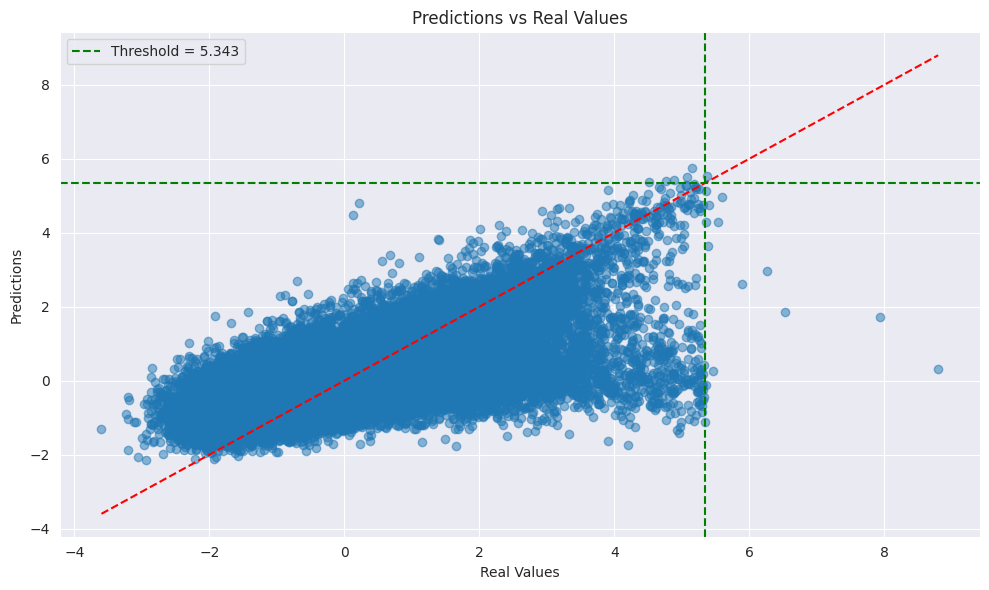

In [7]:
import matplotlib.pyplot as plt

threshold = 5.343
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Predictions vs Real Values')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction


# Add the threshold line
plt.axhline(y=threshold, color='green', linestyle='--')
plt.axvline(x=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()